In [27]:
import pandas as pd 
import numpy as np 

In [28]:
df=pd.read_csv('dataset.csv')
df.drop(columns=['RegNo.'],inplace=True)
df.head()


,Quants,LogicalReasoning,Verbal,Programming,CGPA,Networking,CloudComp,WebServices,DataAnalytics,QualityAssurance,AI,Placed
0,11,11,10,11,10.00,4.3,8.2,8.4,8.3,8.1,8.0,1
1,8,10,11,18,8.80,8.9,8.0,8.0,8.0,8.3,9.4,1
2,11,11,10,8,9.63,8.4,8.0,8.0,8.0,8.0,5.4,1
3,14,13,8,8,6.55,4.5,6.5,6.9,3.3,4.1,4.6,0
4,10,7,7,10,7.27,3.1,5.6,6.7,4.6,2.7,4.4,0


In [29]:
x=df.drop(columns=['Placed'])
y=df['Placed']

In [30]:
!pip install scikit-learn
!pip install matplotlib

  Using cached contourpy-1.3.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.0.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl.metadata (4.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 20.5 MB/s eta 0:00:00a 0:00:01
Using cached contourpy-1.3.0-cp39-cp39-macosx_11_0_arm64.whl (249 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 29.9 MB/s eta 0:00:00
Using cached importlib_resources-6.4.5-py3-none-any.whl (36 kB)
Using cached kiwisolver-1.4.7-cp39-cp39-macosx_11_0_arm64.whl (64 kB)
Using cached pillow-11.0.0-cp39-cp39-macosx_11_0_arm64.whl (3.0 MB)
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)


/opt/anaconda3/envs/venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model Performance:
Logistic Regression: Accuracy = 0.71, F1 Score = 0.71, Precision = 0.71, Recall = 0.71, ROC AUC = 0.78
Random Forest: Accuracy = 0.74, F1 Score = 0.74, Precision = 0.73, Recall = 0.74, ROC AUC = 0.81
AdaBoost: Accuracy = 0.73, F1 Score = 0.73, Precision = 0.73, Recall = 0.73, ROC AUC = 0.79
ANN: Accuracy = 0.77, F1 Score = 0.74, Precision = 0.78, Recall = 0.77, ROC AUC = 0.72


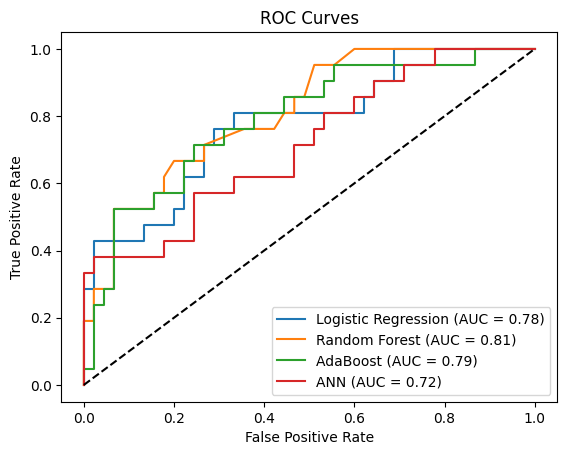

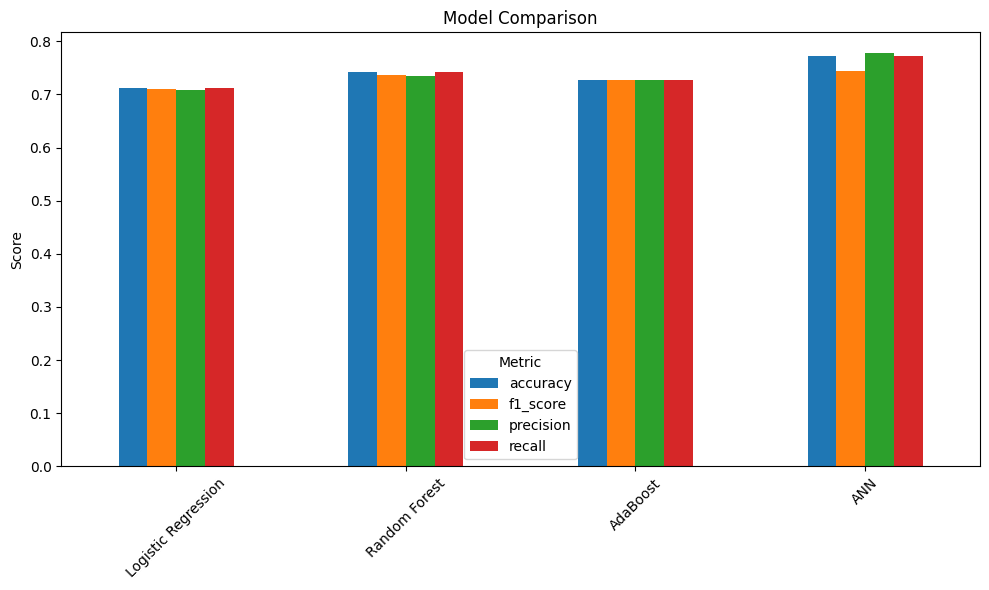

Best Model: ANN
Accuracy: 0.77
F1 Score: 0.74
Best model saved as 'best_model.pkl'


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)
import matplotlib.pyplot as plt
import pickle

# Step 1: Load the data
# Assume x and y are already loaded as pandas dataframes.

# Step 2: Split the data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Step 3: Train models and evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "ANN": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42),
}

results = {}

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    results[model_name] = {
        "model": model,
        "accuracy": acc,
        "f1_score": f1,
        "precision": precision,
        "recall": recall,
        "roc_auc": roc_auc,
    }

    # Plot ROC curve if applicable
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Step 4: Display the results
print("Model Performance:")
for model_name, metrics in results.items():
    print(
        f"{model_name}: Accuracy = {metrics['accuracy']:.2f}, F1 Score = {metrics['f1_score']:.2f}, "
        f"Precision = {metrics['precision']:.2f}, Recall = {metrics['recall']:.2f}, "
        f"ROC AUC = {metrics['roc_auc']:.2f}" if metrics["roc_auc"] is not None else ""
    )

# Finalize ROC curve plot
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Step 5: Bar graph for comparison
metrics_to_plot = ["accuracy", "f1_score", "precision", "recall"]
metrics_df = pd.DataFrame(
    {
        model_name: {metric: metrics[metric] for metric in metrics_to_plot}
        for model_name, metrics in results.items()
    }
).T

metrics_df.plot(kind="bar", figsize=(10, 6), title="Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

# Step 6: Select the best model
best_model_name = max(results, key=lambda k: results[k]["f1_score"])
best_model = results[best_model_name]["model"]

print(f"Best Model: {best_model_name}")
print(f"Accuracy: {results[best_model_name]['accuracy']:.2f}")
print(f"F1 Score: {results[best_model_name]['f1_score']:.2f}")

# Step 7: Save the best model
with open("best_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")


In [32]:
pred_x=model.predict(x)
pred_x

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,